> ### Analyze customer churn data to answer:

- What are the key demographic and service-related factors influencing churn?
- How do payment methods and contract types relate to churn?
- Are certain customer segments more likely to churn?
- Can you visualize churn trends over time?

> Task:

- Perform feature engineering to handle missing data and encode categorical variables.
- Calculate churn rates by demographic and service features.
- Use bar plots and pie charts to visualize customer segments.
- Create a heatmap showing churn rates for different payment methods and contract types.


### Data Source:
Kaggle (Telco Customer churn uploaded by Abdallah Wagih Ibrahim)

### Description:
This dataset contains detailed information about telecom customers in the United States, including their demographic details, subscription plans, and churn status. The data has been collected to help identify the key factors contributing to customer churn, which occurs when customers cancel their services

### Downloading the Datset

In [ ]:
!kaggle datasets download abdallahwagih/telco-customer-churn

Dataset URL: https://www.kaggle.com/datasets/abdallahwagih/telco-customer-churn
License(s): apache-2.0
telco-customer-churn.zip: Skipping, found more recently modified local copy (use --force to force download)


Importing necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Extracting zip file


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/telco-customer-churn.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

Loading the Excel file using Pandas Library

In [ ]:
df = pd.read_excel('/content/Telco_customer_churn.xlsx')

In [ ]:
df

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,...,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,0,45,5306,NaN
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,...,One year,Yes,Mailed check,84.80,1990.5,No,0,59,2140,NaN
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,...,One year,Yes,Credit card (automatic),103.20,7362.9,No,0,71,5560,NaN
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,...,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,59,2793,NaN


In [ ]:
df.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [ ]:
df.shape

(7043, 33)

In [ ]:
df.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,1.000000,100.000000,6500.000000


## Task 1
 ### Perform feature engineering to handle missing data and encode categorical variables.


In [ ]:
df.isnull().sum()

,0
CustomerID,0
Count,0
Country,0
State,0
City,0
Zip Code,0
Lat Long,0
Latitude,0
Longitude,0
Gender,0


There are no missing value in the dataset apart from churn reason

### Encoding Categorical Columns

In [ ]:
# Finding unique value in categorical columns
print("Payment Method:",df["Payment Method"].unique())

print("Contract:",df["Contract"].unique())

print("Gender:",df["Gender"].unique())

Payment Method: ['Mailed check' 'Electronic check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Contract: ['Month-to-month' 'Two year' 'One year']
Gender: ['Male' 'Female']


### Mapping each category to unique integers using one hot encoding

In [ ]:
# for gender
df["Gender"] = df["Gender"].map({0: "Male", 1: "Female"})

In [ ]:
# for Payment Method
df["Payment Method"] =df["Payment Method"].map({'Mailed check':0, 'Electronic check':1, 'Bank transfer (automatic)':2,
 'Credit card (automatic)':3})

In [ ]:
# for contract
df["Contract"] = df["Contract"].map({'Month-to-month': 0, 'One year': 1,'Two year': 2})

In [ ]:
df


,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,0,Yes,0,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,0,Yes,1,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,0,Yes,1,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,0,Yes,1,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,0,Yes,2,103.70,5036.3,Yes,1,89,5340,Competitor had better devices
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,...,2,Yes,2,21.15,1419.4,No,0,45,5306,NaN
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,...,1,Yes,0,84.80,1990.5,No,0,59,2140,NaN
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,...,1,Yes,3,103.20,7362.9,No,0,71,5560,NaN
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,...,0,Yes,1,29.60,346.45,No,0,59,2793,NaN


### Task 2
### Calculating churn rates by demographic and service features

Demographic Features include : gender, city, Senior Citizen, Partner, Dependents

In [ ]:
# Calculating mean churn rate by Gender
demographic_feature = df.groupby("Gender")["Churn Value"].mean()

In [ ]:
# Calculating mean churn rate by Gender
demographic_feature2 = df.groupby("City")["Churn Value"].mean()

In [ ]:
# Calculating mean churn rate by Senior citizen
demographic_feature3 = df.groupby("Senior Citizen")["Churn Value"].mean()

In [ ]:
# Calculating mean churn rate by Patner
demographic_feature4 = df.groupby("Partner")["Churn Value"].mean()

In [ ]:
# Calculating mean churn rate by Dependents
demographic_feature5= df.groupby("Dependents")["Churn Value"].mean()

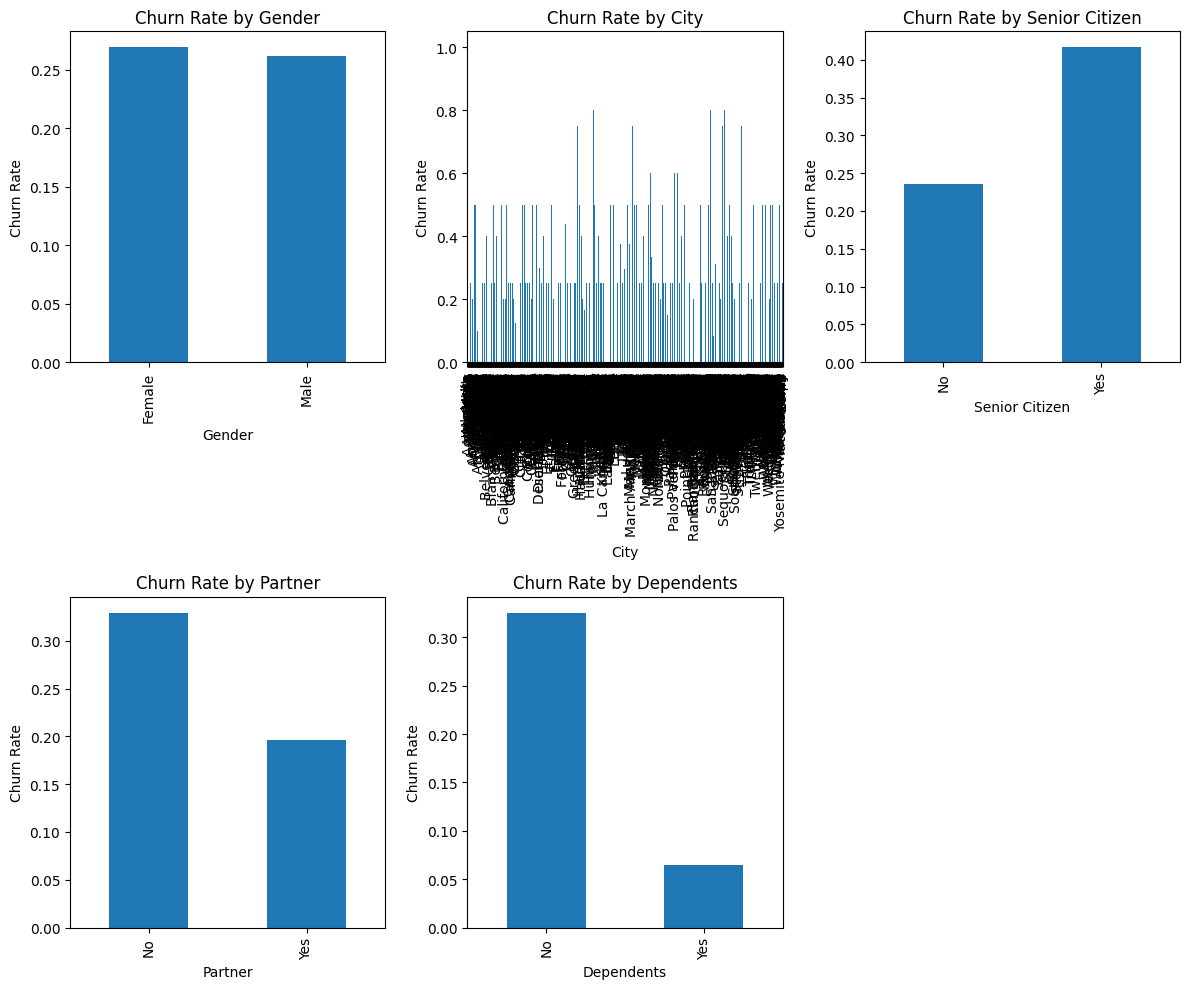

In [ ]:
# Bar plot for churn rate Demographic Features

plt.figure(figsize=(12, 10))

plt.subplot(2, 3, 1)
demographic_feature.plot(kind="bar", title="Churn Rate by Gender")
plt.ylabel("Churn Rate")

plt.subplot(2, 3, 2)
demographic_feature2.plot(kind="bar", title="Churn Rate by City")
plt.ylabel("Churn Rate")

plt.subplot(2, 3, 3)
demographic_feature3.plot(kind="bar", title="Churn Rate by Senior Citizen")
plt.ylabel("Churn Rate")

plt.subplot(2, 3, 4)
demographic_feature4.plot(kind="bar", title="Churn Rate by Partner")
plt.ylabel("Churn Rate")

plt.subplot(2, 3, 5)
demographic_feature5.plot(kind="bar", title="Churn Rate by Dependents")
plt.ylabel("Churn Rate")

# Adjust layout
plt.tight_layout()
plt.show()

From the diagram above churn rate is almost similar for both gender. Churn rate are higher for those who are senior citizens, those who have no prtner and those with no dependents

### Service Features are:
Tenure Months, Phone Service, Multiple Lines, Internet Service, Online Security, Online Backup, Device Protection, Tech Support, Streaming TV, Streaming Movies, Contract, Paperless Billing, Payment Method, Monthly Charges, Total Charges

Calculating mean churn rate by service features

In [ ]:
service_features = df.groupby("Internet Service")["Churn Value"].mean()

In [ ]:
service_feature1 = df.groupby("Tenure Months")["Churn Value"].mean()

In [ ]:
service_feature2 = df.groupby("Phone Service")["Churn Value"].mean()

In [ ]:
service_feature3 = df.groupby("Multiple Lines")["Churn Value"].mean()

In [ ]:
service_feature4 = df.groupby("Online Security")["Churn Value"].mean()

In [ ]:
service_feature5 = df.groupby("Online Backup")["Churn Value"].mean()

In [ ]:
service_feature6 = df.groupby("Device Protection")["Churn Value"].mean()

In [ ]:
service_feature7 = df.groupby("Tech Support")["Churn Value"].mean()

In [ ]:
service_feature8 = df.groupby("Streaming TV")["Churn Value"].mean()

In [ ]:
service_feature9 = df.groupby("Streaming Movies")["Churn Value"].mean()

In [ ]:
service_feature10 = df.groupby("Contract")["Churn Value"].mean()

In [ ]:
service_feature11 = df.groupby("Paperless Billing")["Churn Value"].mean()

In [ ]:
service_feature12 = df.groupby("Payment Method")["Churn Value"].mean()

In [ ]:
service_feature13 = df.groupby("Monthly Charges")["Churn Value"].mean()

In [ ]:
service_feature14 = df.groupby("Total Charges")["Churn Value"].mean()

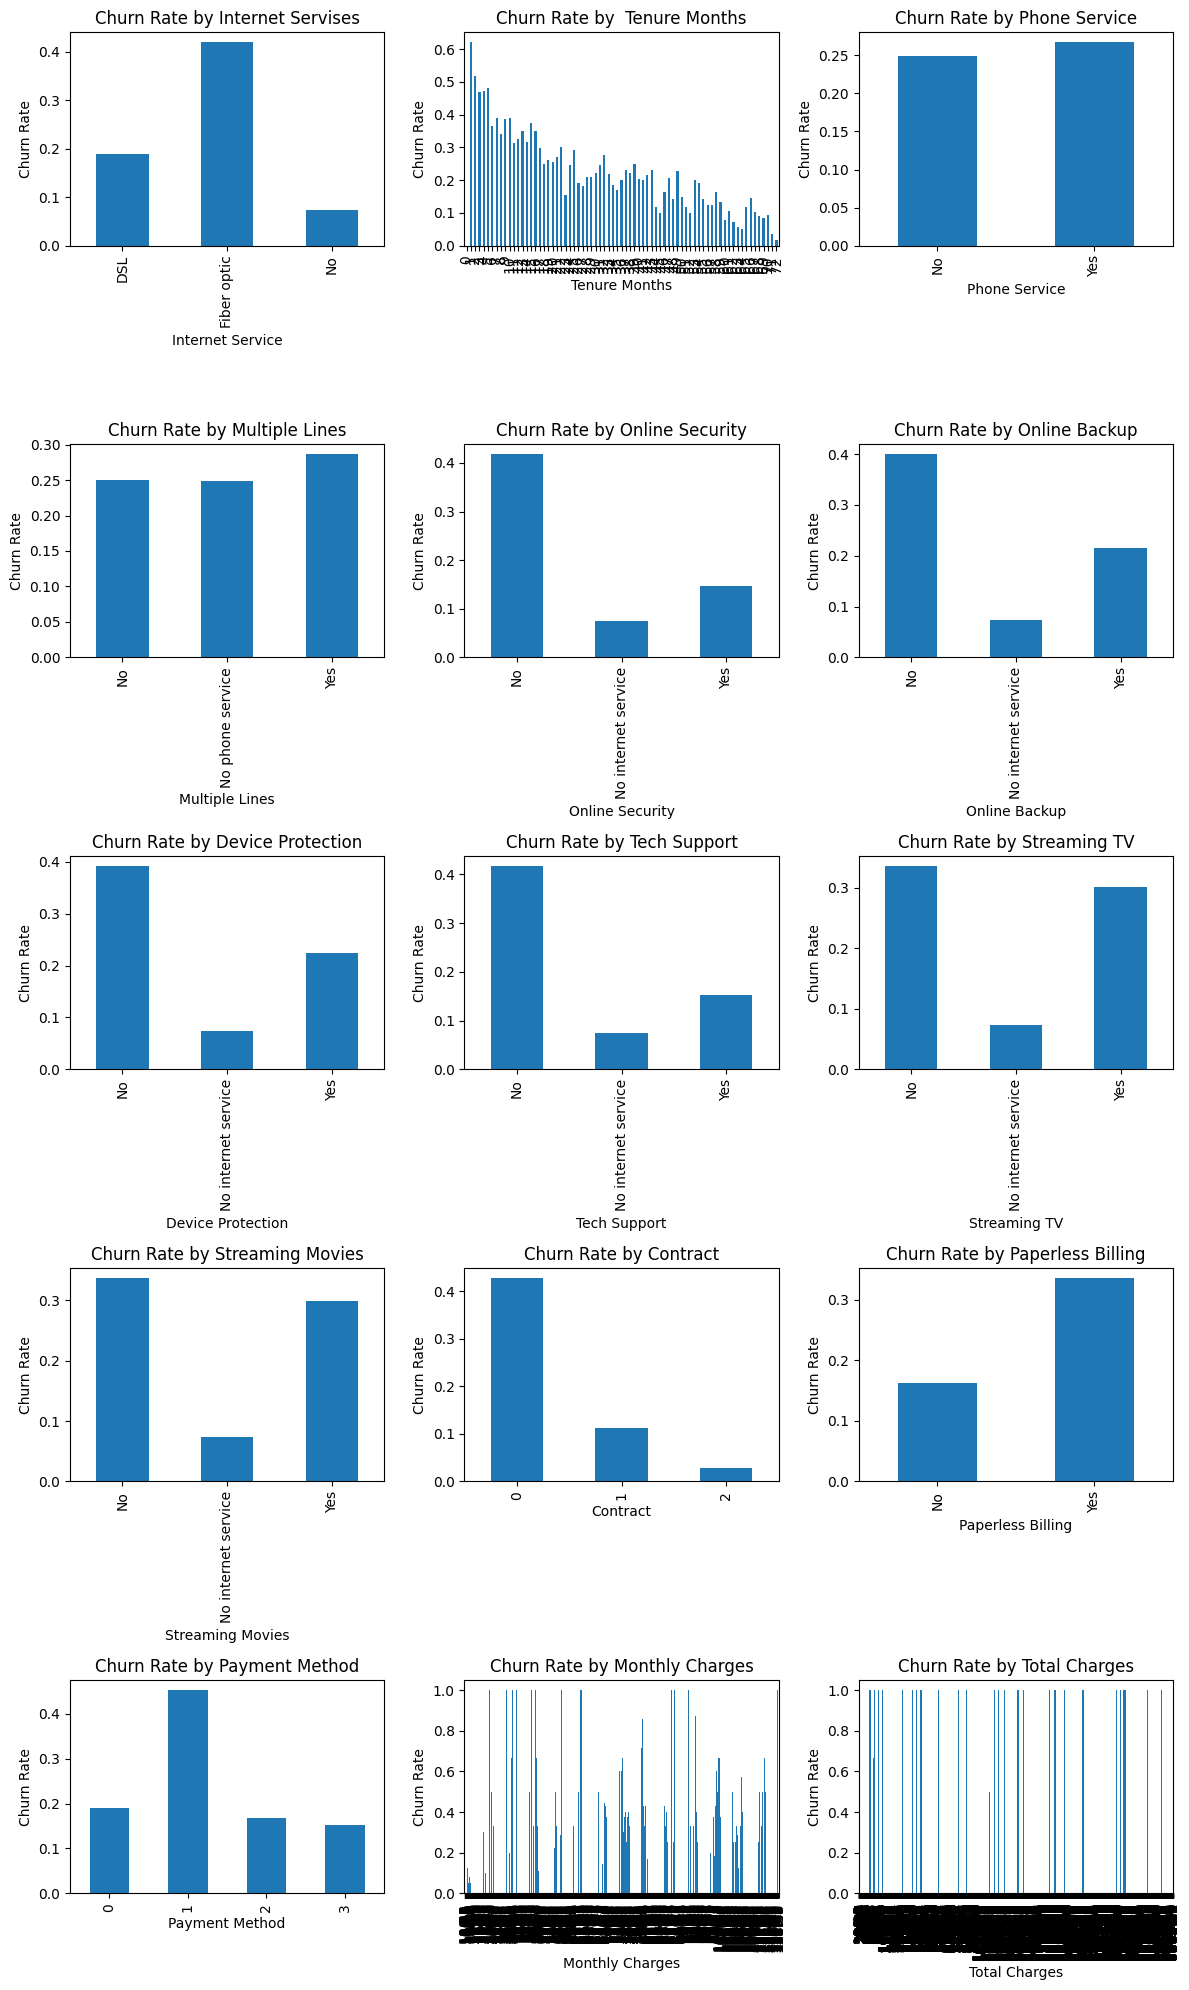

In [ ]:
# Bar plot for churn rate Demographic Features

plt.figure(figsize=(12, 20))

plt.subplot(5, 3, 1)
service_features.plot(kind="bar", title="Churn Rate by Internet Servises")
plt.ylabel("Churn Rate")

plt.subplot(5, 3, 2)
service_feature1.plot(kind="bar", title="Churn Rate by  Tenure Months")
plt.ylabel("Churn Rate")

plt.subplot(5, 3, 3)
service_feature2.plot(kind="bar", title="Churn Rate by Phone Service")
plt.ylabel("Churn Rate")

plt.subplot(5, 3, 4)
service_feature3.plot(kind="bar", title="Churn Rate by Multiple Lines")
plt.ylabel("Churn Rate")

plt.subplot(5, 3, 5)
service_feature4.plot(kind="bar", title="Churn Rate by Online Security")
plt.ylabel("Churn Rate")

plt.subplot(5, 3, 6)
service_feature5.plot(kind="bar", title="Churn Rate by Online Backup")
plt.ylabel("Churn Rate")

plt.subplot(5, 3, 7)
service_feature6.plot(kind="bar", title="Churn Rate by Device Protection")
plt.ylabel("Churn Rate")

plt.subplot(5, 3, 8)
service_feature7.plot(kind="bar", title="Churn Rate by Tech Support")
plt.ylabel("Churn Rate")

plt.subplot(5, 3, 9)
service_feature8.plot(kind="bar", title="Churn Rate by Streaming TV")
plt.ylabel("Churn Rate")

plt.subplot(5, 3, 10)
service_feature9.plot(kind="bar", title="Churn Rate by Streaming Movies")
plt.ylabel("Churn Rate")

plt.subplot(5, 3, 11)
service_feature10.plot(kind="bar", title="Churn Rate by Contract")
plt.ylabel("Churn Rate")

plt.subplot(5, 3, 12)
service_feature11.plot(kind="bar", title="Churn Rate by Paperless Billing")
plt.ylabel("Churn Rate")

plt.subplot(5, 3, 13)
service_feature12.plot(kind="bar", title="Churn Rate by Payment Method")
plt.ylabel("Churn Rate")

plt.subplot(5, 3, 14)
service_feature13.plot(kind="bar", title="Churn Rate by Monthly Charges")
plt.ylabel("Churn Rate")

plt.subplot(5, 3, 15)
service_feature14.plot(kind="bar", title="Churn Rate by Total Charges")
plt.ylabel("Churn Rate")
plt.tight_layout()
plt.show()

Customers with "Fiber Optic" internet have the highest churn rate compared to those with DSL or no internet service.
Customers with a shorter tenure (fewer months) have a significantly higher churn rate compared to those with a longer tenure.
The churn rate for customers with or without phone service multiple lines appears to be similar, suggesting it may not be a significant factor.
Customers who do not subscribe to online security or backup services and device protection tend to have a higher churn rate.
Customers without tech support are more likely to churn compared to those who have it.
The churn rate is higher for customers who use streaming services compared to those who do not.
Customers with month-to-month contracts have significantly higher churn rates compared to those with longer-term contracts.
Customers who use paperless billing have a higher churn rate than those who do not. payment methods (e.g., those labeled as 1 and 3) correlate with higher churn rates.
The charts for monthly and total charges show a scattered distribution, indicating no clear pattern.


### Task 3
Heatmap to visualize customer churn by payment method and contract

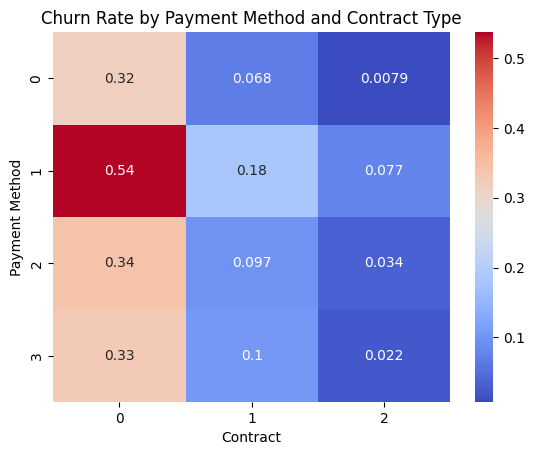

In [ ]:
heatmap_data = df.pivot_table(values="Churn Value", index="Payment Method", columns="Contract")
sns.heatmap(heatmap_data, annot=True, cmap="coolwarm")
plt.title("Churn Rate by Payment Method and Contract Type")
plt.show()



There is moderate positive correlation (0.54) for 'Electronic check' Payment method and "Moth to month" contract type, while other payments and contract relationship are weak in correlation.

<ipython-input-81-860d9518606d>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_trends = df.groupby("Tenure Months Bin")["Churn Value"].mean()


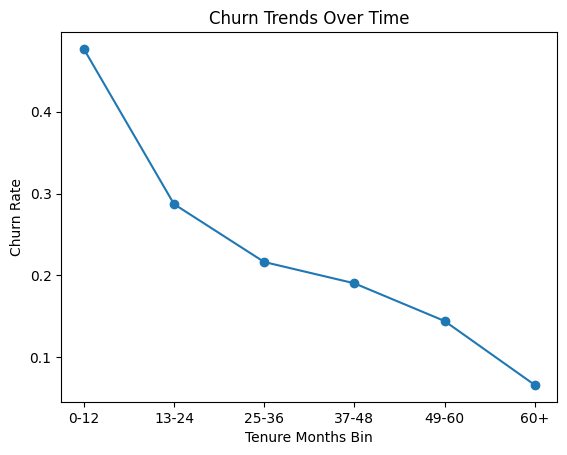

In [ ]:
 # Churn trends over time
df["Tenure Months Bin"] = pd.cut(df["Tenure Months"], bins=[0, 12, 24, 36, 48, 60, np.inf], labels=["0-12", "13-24", "25-36", "37-48", "49-60", "60+"])
churn_trends = df.groupby("Tenure Months Bin")["Churn Value"].mean()
churn_trends.plot(kind="line", marker="o", title="Churn Trends Over Time")
plt.ylabel("Churn Rate")
plt.show()

from the line graph above churn rate tend to reduce as the cutomers tenure increases, i.e the longer the customer has been using the company servises the less likely they churn.